
# Project: TMDB Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.
>
> We are going to investigate the following questions:
>
>>**1- Which genres are most popular from year to year?**
>
>>**2- What kinds of properties are associated with movies that have high revenues?**
>
>>**3-What kinds of properties are associated with the popularity of movies?**


In [1]:
# important packages required for our analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Read our dataset (converting our ".csv" file to a dataFrame):  
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check for the number of rows and columns in the dataFrame:
df.shape

(10866, 21)

In [4]:
# See some statistical data about our dataFrame:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# See information data about our dataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning :

**1-Drop columns that we are not going to use:**

In [6]:
# production_companies,keywords,overview,tagline,director,homepage,cast
df.drop(["production_companies","keywords","overview","tagline","director","homepage","cast"],axis=1,inplace=True)

In [7]:
# Check for the number of rows and columns in the dataFrame:
df.shape

(10866, 14)

In [8]:
# See information data about our dataFrame again:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


**2-Drop rows that are not nessesary:**

In [9]:
df.drop(df[df["imdb_id"].isnull()].index,axis=0,inplace=True)

In [10]:
df.drop(df[df["genres"].isnull()].index,axis=0,inplace=True)

In [11]:
# Check for the number of rows and columns in the dataFrame:
df.shape

(10835, 14)

**3-Check for the duplicated rows in our the dataFrame:**

In [12]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


**4-Drop duplicated rows in our the dataFrame:**

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# Check for the number of rows and columns in the dataFrame:
df.shape

(10834, 14)

**Defining a function to get alot of information about the dataFrame:**

In [15]:
def assessingDataFrame(df):
    """ This function is used to get alot of information about the dataFrame """
    
    print("Numper Of Rows:")
    rows=df.shape[0]
    print(rows)
    
    print("\n\n---------------------------------------------------------------")
    print("Numper Of columns:")
    columns=df.shape[1]
    print(columns)
    
    print("\n\n---------------------------------------------------------------")
    print("Numper Of Duplicated Rows:")
    duplicatedRows=sum(df.duplicated())
    print(duplicatedRows)
    
    print("\n\n---------------------------------------------------------------")
    print("Data Frame Info:")  
    info=df.info()
    print(info)
    
    print("\n\n---------------------------------------------------------------")
    print("Rows with missing data:") 
    print(df.count().max()-df.count().min())
    
    print("\n\n---------------------------------------------------------------")
    print("number of Rows with missing data for each column:")
    print(df.isnull().sum())
    print("\n\n---------------------------------------------------------------")
    
    
    columnsWithMissingValues=[]
    for c in df.columns:
        if df[c].count() < rows:
            columnsWithMissingValues.append(c)
            
    print("\n\n---------------------------------------------------------------")
    print("Columns With Missing Values:")       
    print(columnsWithMissingValues)
    
    print("\n\n---------------------------------------------------------------")
    print("Numper of uniqe values in each column:")
    nUniqe=df.nunique()
    print(nUniqe)
    
    print("\n\n---------------------------------------------------------------")
    for c in df.columns:
        print("{} : unique values are: {} \n".format(c,df[c].unique()))
    

In [16]:
assessingDataFrame(df)

Numper Of Rows:
10834


---------------------------------------------------------------
Numper Of columns:
14


---------------------------------------------------------------
Numper Of Duplicated Rows:
0


---------------------------------------------------------------
Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10834 non-null  int64  
 1   imdb_id         10834 non-null  object 
 2   popularity      10834 non-null  float64
 3   budget          10834 non-null  int64  
 4   revenue         10834 non-null  int64  
 5   original_title  10834 non-null  object 
 6   runtime         10834 non-null  int64  
 7   genres          10834 non-null  object 
 8   release_date    10834 non-null  object 
 9   vote_count      10834 non-null  int64  
 10  vote_average    10834 non-null  float64
 11  release_year 

In [17]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**5-Handling the zero values in both budget and revenue columns:**

In [18]:
for c in ["budget","revenue"]:
    df[c]=df[c].replace(0,df[c].mean())

In [19]:
df

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,1.466613e+07,3.994086e+07,The Endless Summer,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,1.466613e+07,3.994086e+07,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,1.466613e+07,3.994086e+07,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,1.466613e+07,3.994086e+07,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year? )

**To answer this question we have to group the data by "release_year":**

In [20]:
fg=df.groupby(["release_year"])
fg

In [21]:
type(fg.groups)

dict

**We want a dictionary called "d" to be filled with the year as a "key" and the most popular genre in that year as a "value".**

In [22]:
d={}
for k , v in fg.groups.items():
    movies=[]
    for idx in v :
        movies.append(df.loc[idx,"genres"])
    movieSeries=pd.Series(movies)
    countsSeries=movieSeries.value_counts()
    heighiestCountIndex = countsSeries.idxmax()
    d[k]=heighiestCountIndex
        
    

**Now we have our dictionary "d",
the year as a "key" and the most popular genre in that year as a "value".**

In [23]:
d

{1960: 'Horror',
 1961: 'Horror',
 1962: 'Drama',
 1963: 'Horror',
 1964: 'Comedy|Romance',
 1965: 'Action|Adventure|Drama|Western',
 1966: 'Action|Western',
 1967: 'Comedy|Drama|Romance',
 1968: 'Drama',
 1969: 'Drama',
 1970: 'Horror',
 1971: 'Drama',
 1972: 'Comedy',
 1973: 'Crime|Drama',
 1974: 'Drama',
 1975: 'Drama',
 1976: 'Horror|Thriller',
 1977: 'Horror|Science Fiction',
 1978: 'Horror',
 1979: 'Comedy',
 1980: 'Action|Comedy',
 1981: 'Comedy',
 1982: 'Comedy',
 1983: 'Comedy',
 1984: 'Comedy',
 1985: 'Drama',
 1986: 'Comedy',
 1987: 'Comedy',
 1988: 'Drama',
 1989: 'Comedy',
 1990: 'Comedy|Drama',
 1991: 'Comedy',
 1992: 'Drama',
 1993: 'Comedy',
 1994: 'Comedy',
 1995: 'Comedy',
 1996: 'Comedy',
 1997: 'Comedy',
 1998: 'Comedy|Drama',
 1999: 'Comedy',
 2000: 'Comedy',
 2001: 'Comedy',
 2002: 'Comedy|Drama',
 2003: 'Comedy',
 2004: 'Comedy',
 2005: 'Drama',
 2006: 'Drama',
 2007: 'Comedy',
 2008: 'Drama',
 2009: 'Comedy',
 2010: 'Drama',
 2011: 'Drama',
 2012: 'Drama',
 2013

In [24]:
d[2015]

'Drama'

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [25]:
# Check our dataFrame:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**To answer this question we have to study the relation between the following:
"genres","budget","runtime",and the "revenue".**

In [26]:
# let's group the data by genre and sort the results by revenue in an ascending order:
rev_df=df.groupby(["genres"])[["budget","runtime","revenue"]].mean().sort_values(by="revenue",ascending=False)
rev_df

,budget,runtime,revenue
genres,,,
Crime|Drama|Mystery|Thriller|Action,2.200000e+07,114.0,1.106280e+09
Action|Adventure|Science Fiction|Fantasy,1.073331e+08,75.5,1.054060e+09
Family|Fantasy|Adventure,2.000000e+08,108.0,1.025467e+09
Adventure|Fantasy|Family|Mystery,1.500000e+08,138.0,9.382127e+08
Science Fiction|Thriller|Action|Adventure,1.300000e+08,146.0,8.474235e+08
...,...,...,...
Thriller|Horror|Crime,1.466613e+07,106.0,8.090000e+02
History|Action|Adventure,1.466613e+07,99.0,6.410000e+02
Science Fiction|Adventure|Action|Comedy|Family,2.500000e+07,88.0,7.800000e+01


Text(0.5, 1.0, 'Revenue Vs Budget')

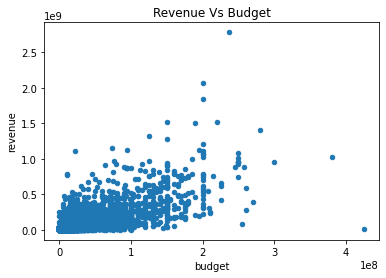

In [27]:
# let's' draw a scatter plot between budget and revenue using "df" :
df.plot(x="budget",y="revenue",kind="scatter")
plt.title("Revenue Vs Budget")

**Increasing the budget will increase the revenue (Positive Correlation)**

Text(0.5, 1.0, 'Revenue Vs Runtime')

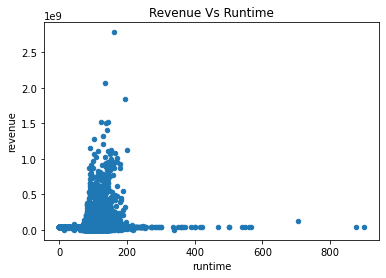

In [28]:
# let's' draw a scatter plot between runtime and revenue using "df" :
df.plot(x="runtime",y="revenue",kind="scatter")
plt.title("Revenue Vs Runtime")

In [29]:
rev_des=rev_df.describe()
rev_des

,budget,runtime,revenue
count,2.037000e+03,2037.000000,2.037000e+03
mean,2.706619e+07,103.165784,7.259815e+07
std,3.004604e+07,31.338829,1.072057e+08
min,1.800000e+01,0.000000,3.000000e+00
25%,1.466613e+07,91.000000,3.855546e+07
50%,1.466613e+07,100.428571,3.994086e+07
75%,2.733307e+07,112.333333,5.671537e+07
max,4.250000e+08,540.000000,1.106280e+09


In [30]:
# mean_runtime
mean_runtime=rev_des.loc["mean","runtime"]
mean_runtime

103.16578395529076

In [31]:
rev_des.loc["75%","budget"]

27333065.46930958

In [32]:
rev_des.loc["75%","revenue"]

56715371.0

In [33]:
# heighiest revenues Vs movies genres 
top=rev_df[rev_df["revenue"] > rev_des.loc["75%","revenue"]]
top

,budget,runtime,revenue
genres,,,
Crime|Drama|Mystery|Thriller|Action,2.200000e+07,114.000000,1.106280e+09
Action|Adventure|Science Fiction|Fantasy,1.073331e+08,75.500000,1.054060e+09
Family|Fantasy|Adventure,2.000000e+08,108.000000,1.025467e+09
Adventure|Fantasy|Family|Mystery,1.500000e+08,138.000000,9.382127e+08
Science Fiction|Thriller|Action|Adventure,1.300000e+08,146.000000,8.474235e+08
...,...,...,...
Action|Crime|Drama|Mystery|Thriller,2.976661e+07,110.500000,5.741732e+07
Drama|Romance|War,1.472204e+07,131.083333,5.731722e+07
Crime|Thriller,2.496865e+07,103.434783,5.730851e+07


In [34]:
top.describe()

,budget,runtime,revenue
count,5.090000e+02,509.000000,5.090000e+02
mean,5.784834e+07,110.220338,1.882372e+08
std,4.055891e+07,21.052404,1.665255e+08
min,1.130000e+02,56.000000,5.687041e+07
25%,2.633307e+07,96.800000,8.057377e+07
50%,4.700000e+07,107.000000,1.225635e+08
75%,8.000000e+07,121.000000,2.254846e+08
max,2.090000e+08,222.600000,1.106280e+09


**So from the top 509 movies the mean runtime should be around 110 minutes.**

Text(0.5, 1.0, 'Revenue Vs Popularity')

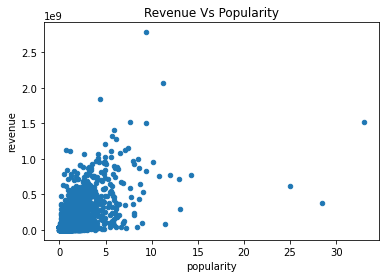

In [35]:
# "revenue" Vs "popularity"
df.plot(y="revenue",x="popularity",kind="scatter")
plt.title("Revenue Vs Popularity")

**Increasing popularity has a positive effect on revenue (Positive Correlation)**

In [36]:
# top 10 genres:
top10=top[:10]
top10

,budget,runtime,revenue
genres,,,
Crime|Drama|Mystery|Thriller|Action,2.200000e+07,114.0,1.106280e+09
Action|Adventure|Science Fiction|Fantasy,1.073331e+08,75.5,1.054060e+09
Family|Fantasy|Adventure,2.000000e+08,108.0,1.025467e+09
Adventure|Fantasy|Family|Mystery,1.500000e+08,138.0,9.382127e+08
Science Fiction|Thriller|Action|Adventure,1.300000e+08,146.0,8.474235e+08
Action|Thriller|Science Fiction|Mystery|Adventure,1.600000e+08,148.0,8.255000e+08
Science Fiction|Adventure|Family|Fantasy,1.050000e+07,115.0,7.929106e+08
Family|Animation|Drama,4.500000e+07,89.0,7.882418e+08
Fantasy|Adventure|Action|Family|Romance,1.800000e+08,97.0,7.584104e+08


**To make a successful movie it should be one of the "top 10" genres, or at least one of the "top" genres.**

Text(0, 0.5, 'Revenue & Budget ($)')

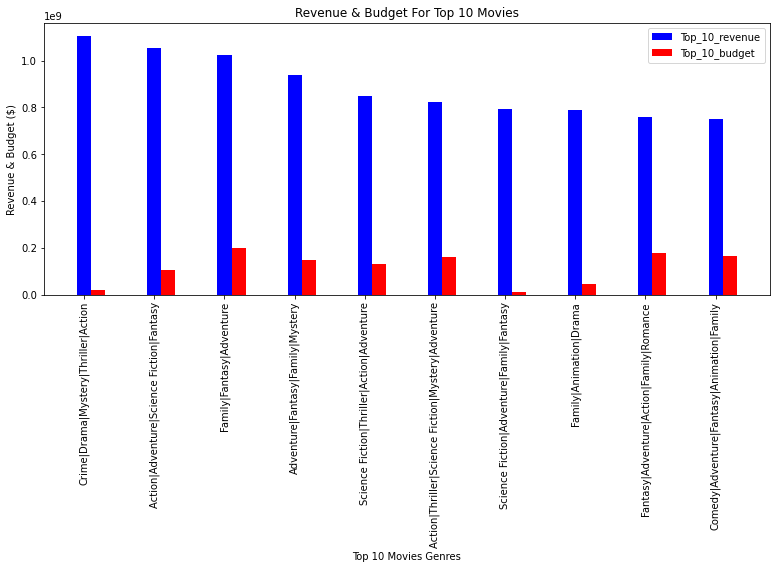

In [37]:
# A comparison between the revenue and budget for the top 10 movies:
h1=top10["revenue"]
h2=top10["budget"]
location=np.arange(0,10)
xAxis=list(top10.index)
w=0.2
figure(figsize=(13,5))
plt.bar(x=location,height=h1,color="blue",width=w,label="Top_10_revenue")
plt.bar(x=location+w,height=h2,color="red",width=w,label="Top_10_budget")
plt.xticks(location,xAxis,rotation="vertical")
plt.legend()
plt.title("Revenue & Budget For Top 10 Movies")
plt.xlabel("Top 10 Movies Genres")
plt.ylabel("Revenue & Budget ($)")

In [38]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 3  (What kinds of properties are associated with popularity of movies?)

Text(0.5, 1.0, 'Vote_count Vs Popularity')

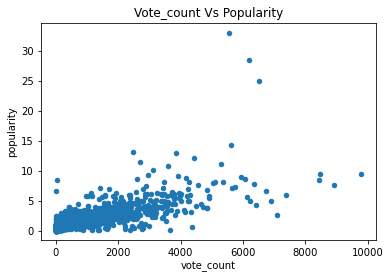

In [39]:
# "vote_count" Vs "popularity"
df.plot(x="vote_count",y="popularity",kind="scatter")
plt.title("Vote_count Vs Popularity")

**Increasing in vote_count has positive effectve Correlation**

Text(0.5, 1.0, 'Vote_average Vs Popularity')

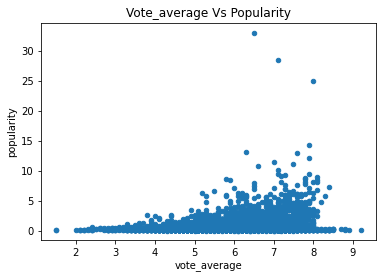

In [40]:
# "vote_average" Vs "popularity"
df.plot(x="vote_average",y="popularity",kind="scatter")
plt.title("Vote_average Vs Popularity")

**Increasing in vote_average has positive effect on popularity (Positive Correlation)**

Text(0.5, 1.0, 'Budget Vs Popularity')

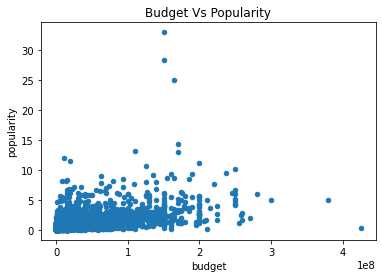

In [41]:
df.plot(x="budget",y="popularity",kind="scatter")
plt.title("Budget Vs Popularity")

**Increasing in budget has small positive effect on popularity.**

<a id='conclusions'></a>
## Conclusions

**Results: Based on our data:**

> **1-Increasing the budget will increase the revenue (Positive Correlation)**
>
>**2-From the top 509 movies the mean runtime should be around 110 minutes.**
>
>**3-Increasing popularity has a positive effect on revenue (Positive Correlation)**
>
>**4-To make a successful movie it should be one of the "top 10" genres, or at least one of the "top" genres.**
>
>**5-Increasing in vote_count has positive effectve Correlation**
>
>**6-Increasing in vote_average has positive effect on popularity (Positive Correlation)**
>
>**7-Increasing in budget has small positive effect on popularity.**

**Limitations: We have the following limitations:**
>**1-Our data has zero values in both "budget" and "revenue" columns, so we had to replace the zeros in each column by the<br>  &emsp; mean value of that column.**
>
>**2-Our data has "one duplicated row", so we had to drop it from our data.**
>
>**3-Our data has missing values in both "imdb_id" and "genres", so we had to drop these rows from our data.**
>
>**4-Our data has the following columns:"production_companies","keywords","overview","tagline","director","homepage,cast"<br>  &emsp;        and these columns are not going to help us for answering our questions , so we had to drop these rows from our data.**